<h1 style="text-align:center;">Data Scientist Practical Exam DS601P</h1>
<h5 style="text-align:center;"> ELEFTHERIOS DIAMANTIDIS</h5>

---

Your written report should include written text summaries and graphics of the following:

- Data Validation:
    - Describe validation and cleaning steps for every column in the data
- Exploratory Analysis:
    - Include two different graphics showing single variables only to demonstrate the characteristics of data
    - Include at least one graphic showing two or more variables to represent the relationship between features
    - Describe your findings
- Model Development
    - Include your reasons for selecting the models you use as well as a statement of the problem type
    - Code to fit the baseline and comparison models
- Model Evaluation
    - Describe the performance of the two models based on an appropriate metric
- Business Metrics
    - Define a way to compare your model performance to the business
    - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

---

In this notebook, the objective is to predict recipes that will achieve an 80% popularity rate, while minimizing the exposure of unpopular recipes.

Steps:
1) Begin by ensuring data validity through actions such as removing duplicates, addressing missing values, and adjusting the data types of dataframe columns. 

2) Next, we will dive into exploratory data analysis to extract insights. 

3) With these insights, we will develop and compare machine learning models and assess their performances.

4) Finally, we will align our solution with business metrics and provide recommendations as needed to benefit the business.

### **Step 1:** Import Libraries

In [283]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Prevent line-wrapping

from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### **Step 2:** Import data

In [284]:
# Load data
df = pd.read_csv('recipe_site_traffic_2212.csv')

print(df.head())

   recipe  calories  carbohydrate  sugar  protein   category servings high_traffic
0       1       NaN           NaN    NaN      NaN       Pork        6         High
1       2     35.48         38.56   0.66     0.92     Potato        4         High
2       3    914.28         42.68   3.09     2.88  Breakfast        1          NaN
3       4     97.03         30.56  38.63     0.02  Beverages        4         High
4       5     27.05          1.85   0.80     0.53  Beverages        4          NaN


### **Step 3:** Data Validation

In [285]:
print("\nData Types:")
print(df.dtypes)


Data Types:
recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object


In [286]:
df.duplicated(subset='recipe').sum()

0

Since the are no duplicated recipes, no row removal is necessary.

Next step is to examine the dimensions of the dataset, and identify column names and their data types.

Additionaly, the count of non-null values in each column will be assessed.

If any data type conversions are required or if there are missing values to address, appropriate actions to rectify these concerns will be taken.

In [287]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [288]:
print(df['servings'].value_counts())

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64


In [289]:
# Replacing the rows including "as a snack" with their relevant numeric number
df['servings'] = df['servings'].str.replace(" as a snack", "")

# Checking the servings column again
print(df['servings'].value_counts())

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64


Now we can convert the "servings" column to integer.

In [290]:
df['servings'] = df['servings'].astype('int')

Given that the "high_traffic" column's data type is also currently categorized as object, it's necessary to examine the distribution of values within this column.

In [291]:
print(df['high_traffic'].value_counts())

high_traffic
High    574
Name: count, dtype: int64


In [292]:
print(df['high_traffic'].unique())

['High' nan]


As the "high_traffic" column only contains a single value, namely "High," the interpretation is that null values in this column correspond to "Low" traffic.

Consequently, we can convert the data type of this column to boolean.

In this context, True signifies "High" traffic, while False indicates "Low" traffic.

In [293]:
# Replacing the rows with value "High" with True, and null values with False
df['high_traffic'] = np.where(df['high_traffic'] == "High", True, False)

# Checking the values of high_traffic column again
print(df['high_traffic'].value_counts())

high_traffic
True     574
False    373
Name: count, dtype: int64


The final column requiring attention is the "category" column. Currently classified as object type, we must evaluate whether any rows need modification to facilitate the conversion into the category type.

Our initial step involves inspecting the distribution of values within this column to gain a clearer understanding.'''

In [294]:
# Checking the values of category column
print(df['category'].value_counts())

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64


It appears that an extra category, "Chicken Breast," is present in the "category" column. 

However, as the stipulated criteria dictates the inclusion of specific categories like 'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', and 'One Dish Meal,' it's evident that 'Chicken Breast' doesn't conform and need to be assigned in the 'Chicken' caytegory.

In [295]:
# Replacing the rows including "as a snack" with their relevant numeric number
df['category'] = df['category'].str.replace(" Breast", "")

# Checking the values of servings column again
print(df['category'].value_counts())

# Converting data type of category column to category
df['category'] = df['category'].astype('category')

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: count, dtype: int64


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB


In [297]:
# Checking missing numbers for each columns
print(df.isna().sum())

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64


In [298]:
print(df[df.isna().any(axis=1)])

     recipe  calories  carbohydrate  sugar  protein       category  servings  high_traffic
0         1       NaN           NaN    NaN      NaN           Pork         6          True
23       24       NaN           NaN    NaN      NaN           Meat         2         False
48       49       NaN           NaN    NaN      NaN        Chicken         4         False
82       83       NaN           NaN    NaN      NaN           Meat         4          True
89       90       NaN           NaN    NaN      NaN           Pork         6          True
116     117       NaN           NaN    NaN      NaN        Chicken         6          True
121     122       NaN           NaN    NaN      NaN        Dessert         2          True
136     137       NaN           NaN    NaN      NaN  One Dish Meal         2          True
149     150       NaN           NaN    NaN      NaN         Potato         2          True
187     188       NaN           NaN    NaN      NaN           Pork         4          True

In [299]:
# Drop rows with any NaN values
df = df.dropna().reset_index(drop=True)

In [300]:
print(df.isna().sum())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 44.2 KB


### **Step 4:** Exploratory Data Analysis

The dataframe is now ready for exploratory analysis.

Moving forward, we can compute descriptive statistics for each numerical column within the dataframe. 

In [302]:
print(df.describe())

           recipe     calories  carbohydrate       sugar     protein    servings
count  895.000000   895.000000    895.000000  895.000000  895.000000  895.000000
mean   473.652514   435.939196     35.069676    9.046547   24.149296    3.458101
std    272.763283   453.020997     43.949032   14.679176   36.369739    1.735979
min      2.000000     0.140000      0.030000    0.010000    0.000000    1.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000    2.000000
50%    475.000000   288.550000     21.480000    4.550000   10.800000    4.000000
75%    708.500000   597.650000     44.965000    9.800000   30.200000    4.000000
max    947.000000  3633.160000    530.420000  148.750000  363.360000    6.000000


Analyzing the descriptive statistics, we can conclude that there is a signifficant standard deviation in columns related to calories and recipe.

Additionally, the quantile values indicate the presence of outliers, contributing to skewness in the distribution. 

As a result, we can deduce that the value distribution is non-normal, underscoring that the median is a more representative measure for these columns.

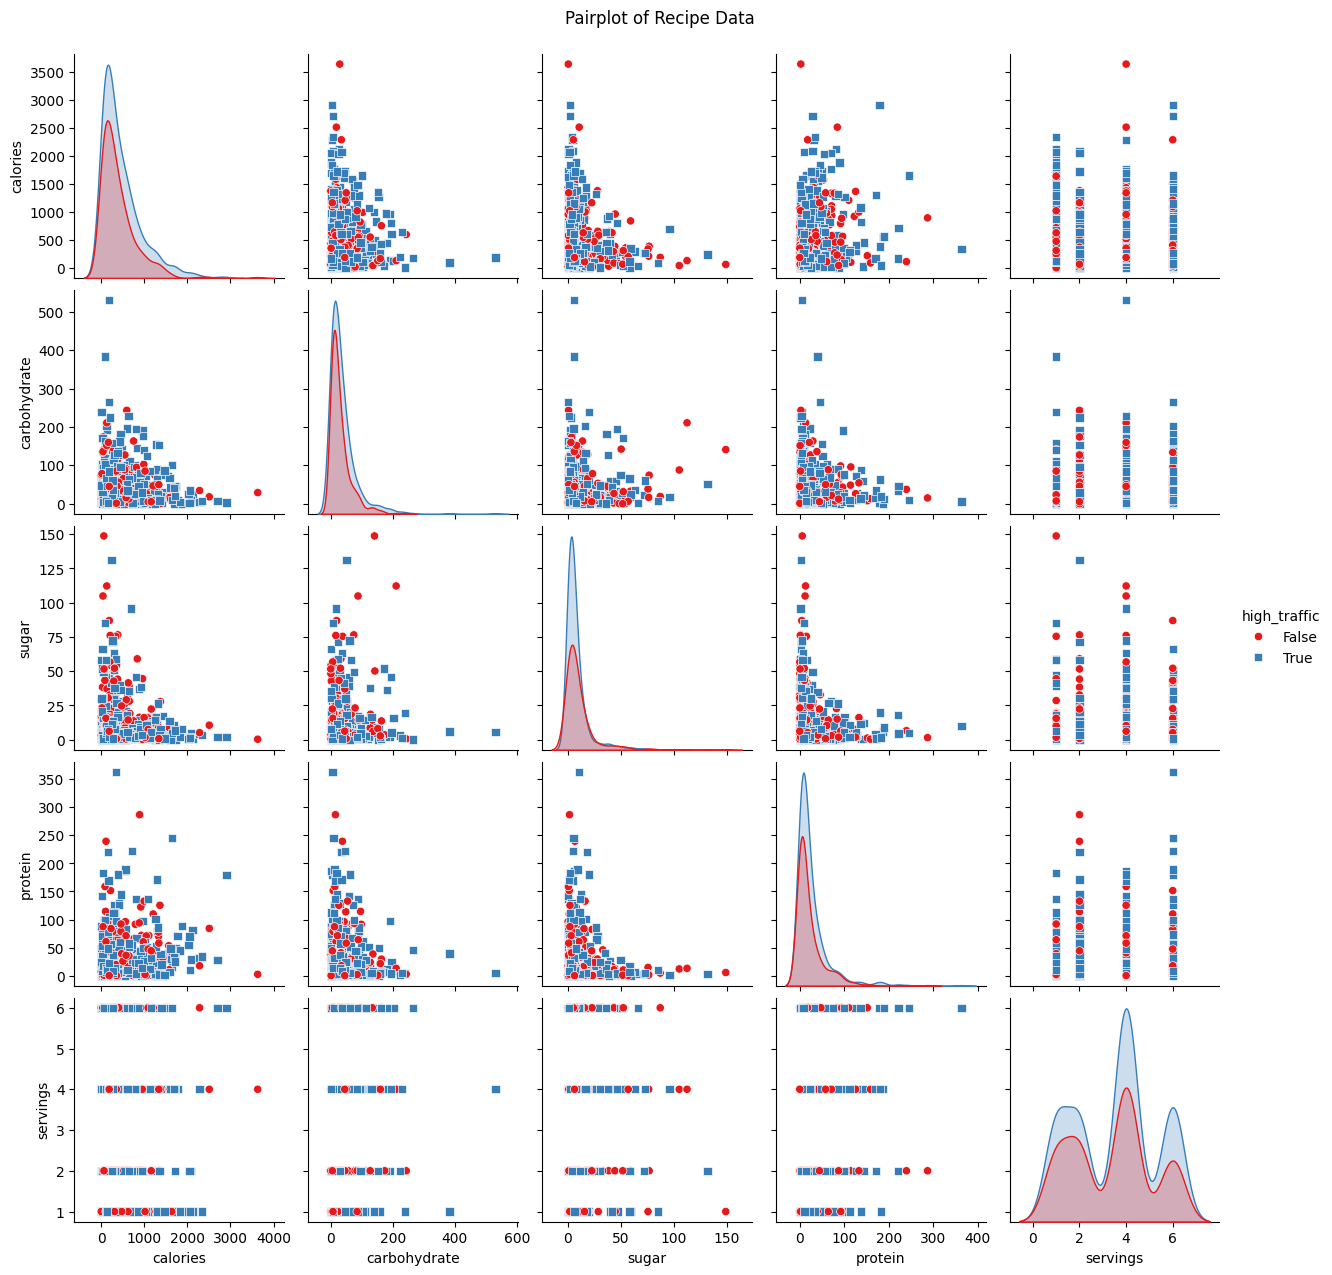

In [303]:
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(df[filtered_columns], hue='high_traffic', diag_kind='kde', markers=["o", "s"], palette="Set1")
plt.suptitle('Pairplot of Recipe Data', y=1.02)
plt.show()

Based on the plot, it's apparent that there isn't a significant correlation between these columns.

Next, we'll proceed to generate histograms to visualize the distributions of calories, carbohydrate, sugar and protein.

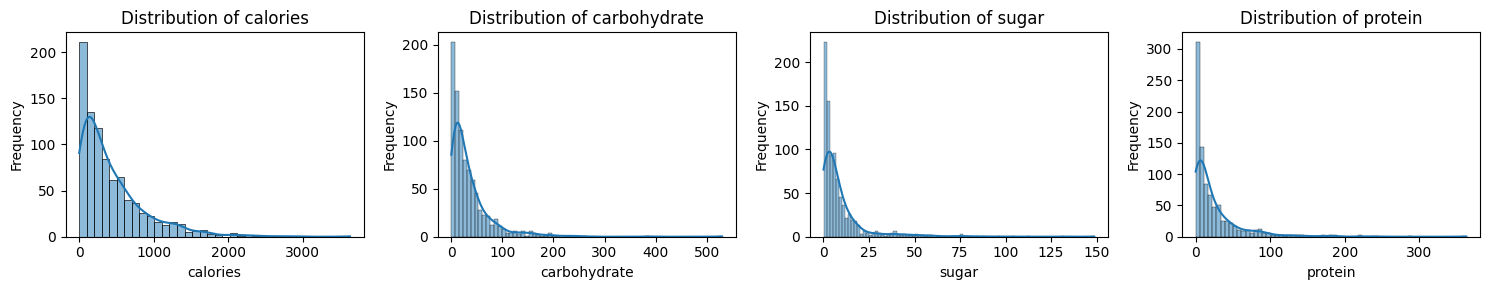

In [304]:
# Select the numerical columns to plot
numerical_columns =  df.select_dtypes(include='float').columns

# Creating subplots with the desired number of rows and columns
num_rows = 1
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3))

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Iterating through the numerical columns and plotting histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The presence of Kernel Density Estimation (KDE) in the plots results in a smooth curve that illustrates the underlying data distribution.

Upon observation, it becomes evident that the dataset predominantly consists of lower values concerning the calorie and nutritional components of foods or beverages. 

The histograms validate our earlier assertion regarding skewness. Indeed, all the numerical columns display a right-skewed distribution.

To further illustrate the distribution, let's proceed to present it using box plots.

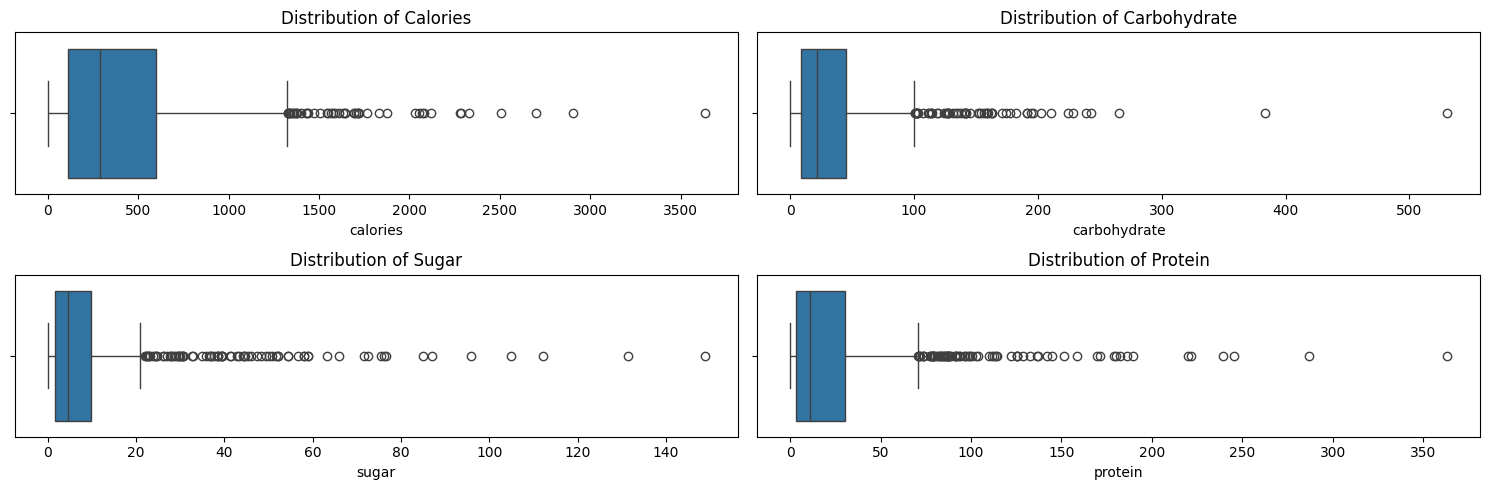

In [305]:
# Creating subplots with the desired number of rows and columns
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Flattening the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

plt.tight_layout()
plt.show()

Once again, the plots above affirm the existence of outliers, the right-skewed nature of these columns, and the importance of employing the median for analysis.

Furthermore, we can delve into the median values of calories and nutritional components based on the category. We can achieve this by grouping the data according to the category and then calculating the median aggregation.

In [306]:
# Group by category column and find total number of servings
category_medians = df.groupby("category")[numerical_columns].median().reset_index()
print(category_medians)

        category  calories  carbohydrate   sugar  protein
0      Beverages   126.455        11.250   8.075    0.410
1      Breakfast   229.380        28.420   4.830   11.685
2        Chicken   379.160        15.490   3.500   33.170
3        Dessert   288.550        38.550  24.650    4.810
4   Lunch/Snacks   369.505        31.985   2.750   12.965
5           Meat   460.870        19.115   3.385   28.530
6  One Dish Meal   419.280        25.430   4.040   28.480
7           Pork   399.260        19.560   5.230   29.820
8         Potato   269.460        32.540   2.640    5.900
9      Vegetable   124.305        13.335   3.700    4.835


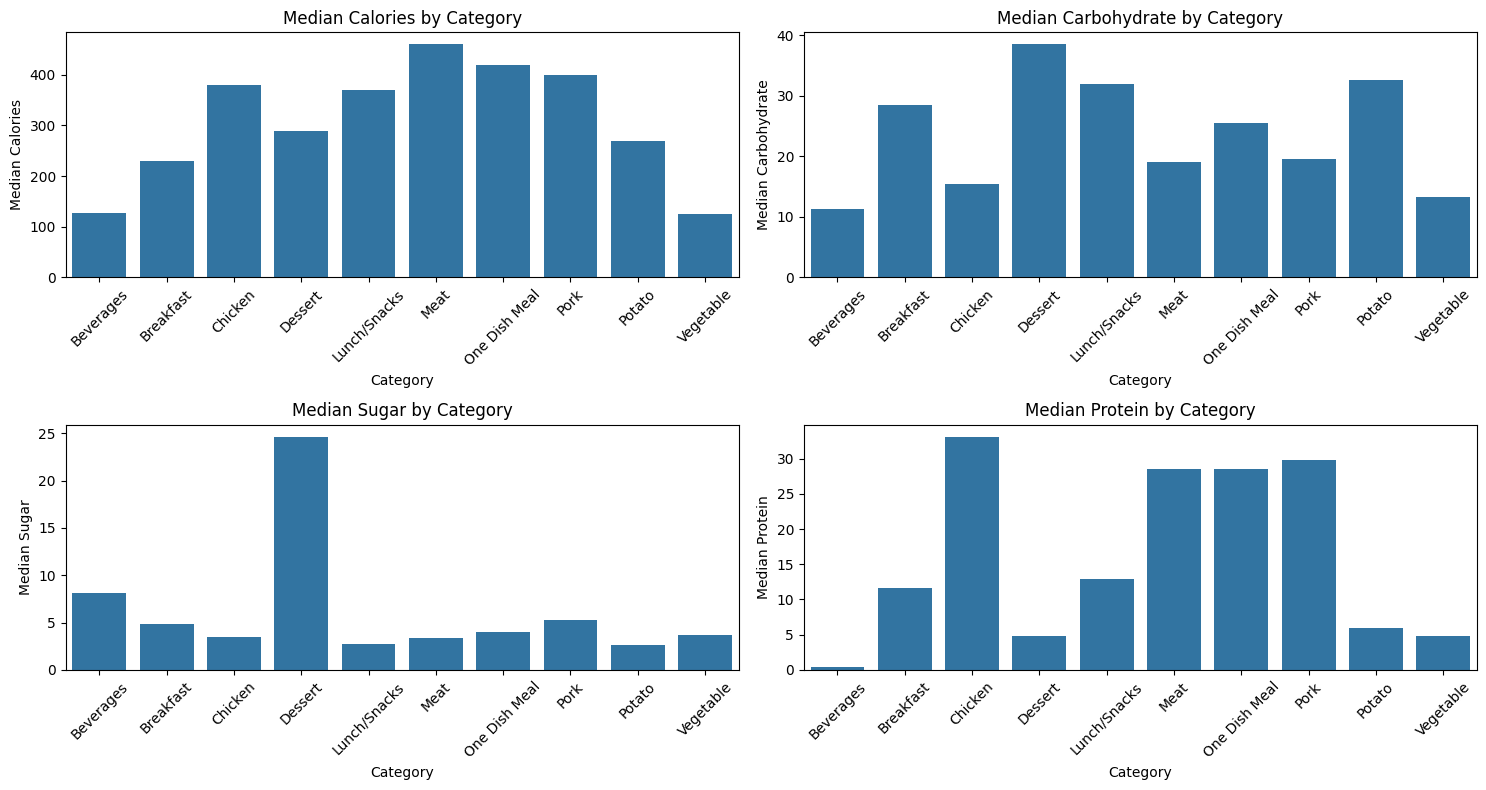

In [307]:
num_rows = 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

#flattening the axes array for easy iteration
axes = axes.flatten()

for column in numerical_columns:
    ax = axes[numerical_columns.tolist().index(column)]
    sns.barplot(data=category_medians, x="category", y=column, ax=ax)
    ax.set_title(f"Median {column.capitalize()} by Category")
    ax.set_xlabel("Category")
    ax.set_ylabel(f"Median {column.capitalize()}")
    ax.tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

We observe that the medians for calories and nutritional components aren't symmetrical as anticipated, varying depending on the type of food and beverages.

Moving forward, let's begin by examining the relationship between servings and high traffic status.

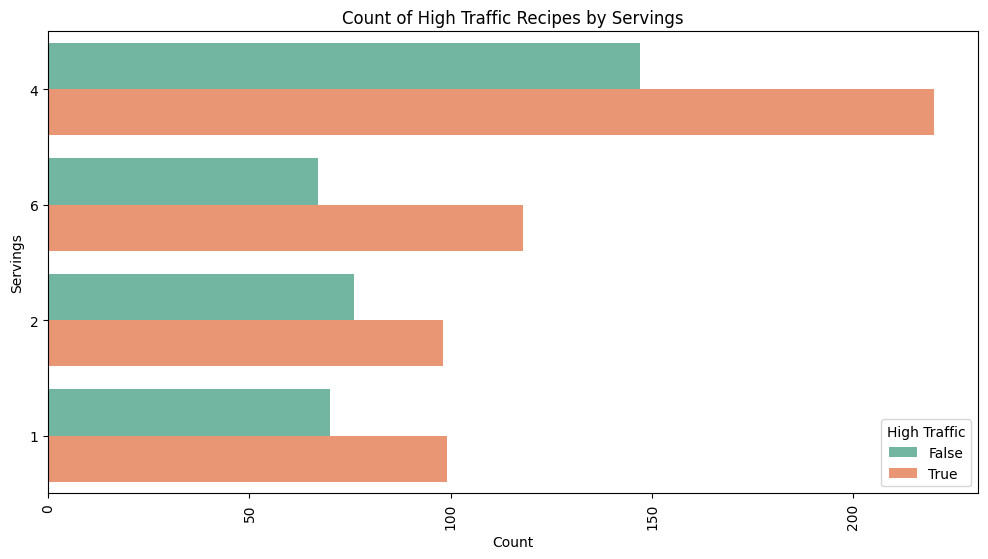

In [308]:
# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="servings", hue="high_traffic", order=df['servings'].value_counts().index, palette="Set2")
plt.xlabel("Count")
plt.ylabel("Servings")
plt.title("Count of High Traffic Recipes by Servings")
plt.xticks(rotation=90)
plt.legend(title="High Traffic")
plt.show()

In [309]:
# Group by high_trafic to show how total number of survings is distributed
high_traffic_servings = pd.pivot_table(df, index=["servings"], columns=["high_traffic"], values="recipe", aggfunc='count')
high_traffic_servings_normalized = high_traffic_servings.div(high_traffic_servings.sum(axis=1), axis=0)

print(high_traffic_servings_normalized)

high_traffic     False     True 
servings                        
1             0.414201  0.585799
2             0.436782  0.563218
4             0.400545  0.599455
6             0.362162  0.637838


Both the plot and the normalized values illustrate that recipes with 6 servings exhibit a higher rate of high traffic.

Next, we'll proceed to examine the relationship between categories and high traffic status.

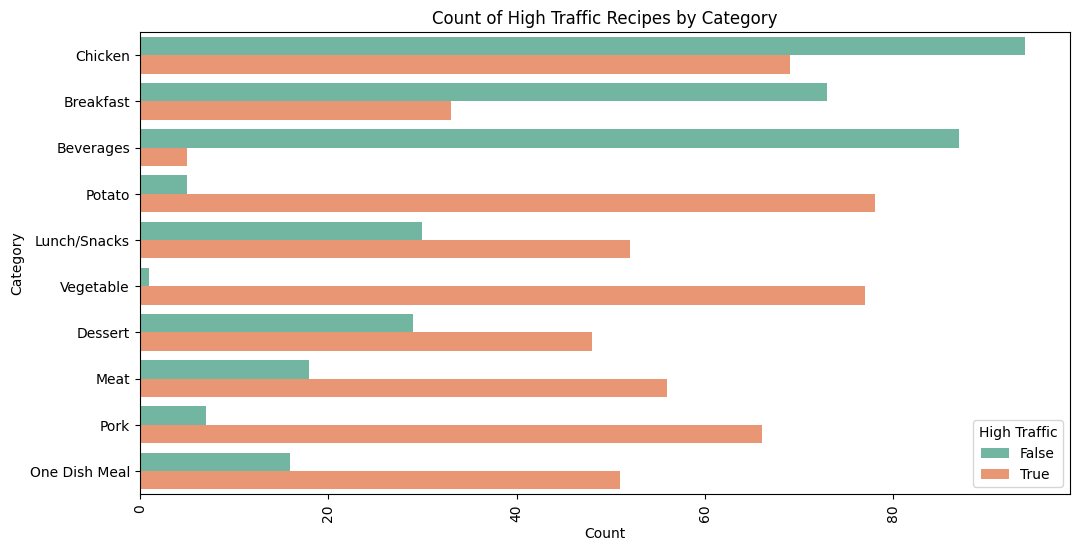

In [310]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="category", hue="high_traffic", order=df['category'].value_counts().index, palette="Set2")
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Count of High Traffic Recipes by Category")
plt.xticks(rotation=90)
plt.legend(title="High Traffic")
plt.show()

In [311]:
# Create pivot table for aggregation
high_traffic_category = df.pivot_table(index="category", columns="high_traffic", values="servings", aggfunc="sum")
normalized_table = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

print(normalized_table.sort_values(by=True, ascending=False))

high_traffic      False     True 
category                         
Vegetable      0.013986  0.986014
Potato         0.041139  0.958861
Pork           0.087452  0.912548
One Dish Meal  0.198068  0.801932
Meat           0.270270  0.729730
Dessert        0.372263  0.627737
Lunch/Snacks   0.385965  0.614035
Chicken        0.581056  0.418944
Breakfast      0.685294  0.314706
Beverages      0.939873  0.060127


Consequently, we can conclude that showcasing recipes in certain categories leads to increased traffic.

The top three categories in terms of high traffic are "Vegetable," "Potato," and "Pork." 

On the other hand, the "Beverages" category appears to have the lowest traffic impact.

Addressing this problem involves leveraging binary classification algorithms from the realm of supervised machine learning.
We have the option to select an appropriate classification model to predict the high traffic status. 
Our choices include Logistic Regression, Random Forest, and Support Vector Machines. 
For our baseline model, we'll use Logistic Regression, and the others will be considered for comparison.

Before proceeding with Logistic Regression, let's tackle the issue of outliers within our dataset. 
To achieve this, we'll compute the Interquartile Range (IQR) for each column and subsequently determine the upper and lower boundaries to manage the outliers more effectively.

In [312]:
# Function to calculate upper and lower boundaries of columns
def calculate_outlier_limits(data):
    
    # Find 25% and 75% percentiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate lower and upper boundaries
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    return lower_limit, upper_limit

In [313]:
# Select numerical columns
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

# Calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = calculate_outlier_limits(df[column])
    outlier_limits[column] = (lower_limit, upper_limit)

# Check the calculated outlier limits for each column
for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}\n")

Column: calories
Lower Limit: -620.3999999999999
Upper Limit: 1328.48

Column: carbohydrate
Lower Limit: -46.510000000000005
Upper Limit: 99.85000000000001

Column: sugar
Lower Limit: -10.475000000000003
Upper Limit: 21.965000000000003

Column: protein
Lower Limit: -37.31250000000001
Upper Limit: 70.70750000000001



As anticipated, there are no concerns with respect to low values; On the other hand, certain high values require attention.
Various techniques are available to address this issue. Upon evaluation, it's apparent that outright removal of outliers leads to significant data loss, making this approach less favorable.
Similarly, capping outliers or using winsorization doesn't yield the desired distribution.

Through experimentation with diverse transformation methods including Logarithmic Transformation, Square Root Transformation, Yeo-Johnson Transformation, and Box-Cox Transformation, it has been determined that the Yeo-Johnson Transformation is the most effective approach.

Note that a few columns contain 0 values. While the Box-Cox Transformation could be used after replacing these 0 values with a very small value (e.g., 0.00001), such a replacement might introduce bias. Therefore, the Yeo-Johnson method has been preferred in this case.'''

In [314]:
transformed_data = df.copy()

def tranform_data(transformed_data, outlier_limits, method):
    for column, limits in outlier_limits.items():
        if method == 'remove_outliers':
            transformed_data = transformed_data[transformed_data[column] <= upper_limit]
        elif method == 'cap_outliers':
            transformed_data[column] = transformed_data[column].clip(upper=upper_limit)
        elif method == 'winsorize':
            transformed_data[column] = winsorize(transformed_data[column], limits=[0.05, 0.05])
        elif method == 'log_transform':
            transformed_data[column] = np.log1p(transformed_data[column])
        elif method == 'sqrt_transform':
            transformed_data[column] = np.sqrt(transformed_data[column])
        elif method == 'boxcox_transform':
            transformed_data.loc[transformed_data[column] == 0, column] = 0.00001
            transformed_data[column] = boxcox(transformed_data[column])[0]
        elif method == 'yeojohnson_transform':
            transformed_data[column] = yeojohnson(transformed_data[column])[0]
        else:
            raise ValueError("Invalid transformation method specified.")
        
    print(transformed_data.head())
    
    num_rows = 1
    num_cols = 4
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))
    
    axes = axes.flatten()
    
    # Plotting the transformed data
    for i, column in enumerate(transformed_data.select_dtypes(include='float').columns):
        sns.histplot(transformed_data[column], kde=True, ax=axes[i], bins=30)
        axes[i].set_title(f'Distribution of {column} after Transformation')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        plt.tight_layout()

    return transformed_data

   recipe   calories  carbohydrate     sugar   protein       category  servings  high_traffic
0       2   5.742712      4.409023  0.481476  0.653469         Potato         4          True
1       3  17.437753      4.550612  1.224094  1.360783      Breakfast         1         False
2       4   8.416476      4.091120  2.587146  0.019804      Beverages         4          True
3       5   5.133412      1.101661  0.553884  0.425754      Beverages         4         False
4       6  16.024489      1.607528  0.883720  4.049462  One Dish Meal         2          True


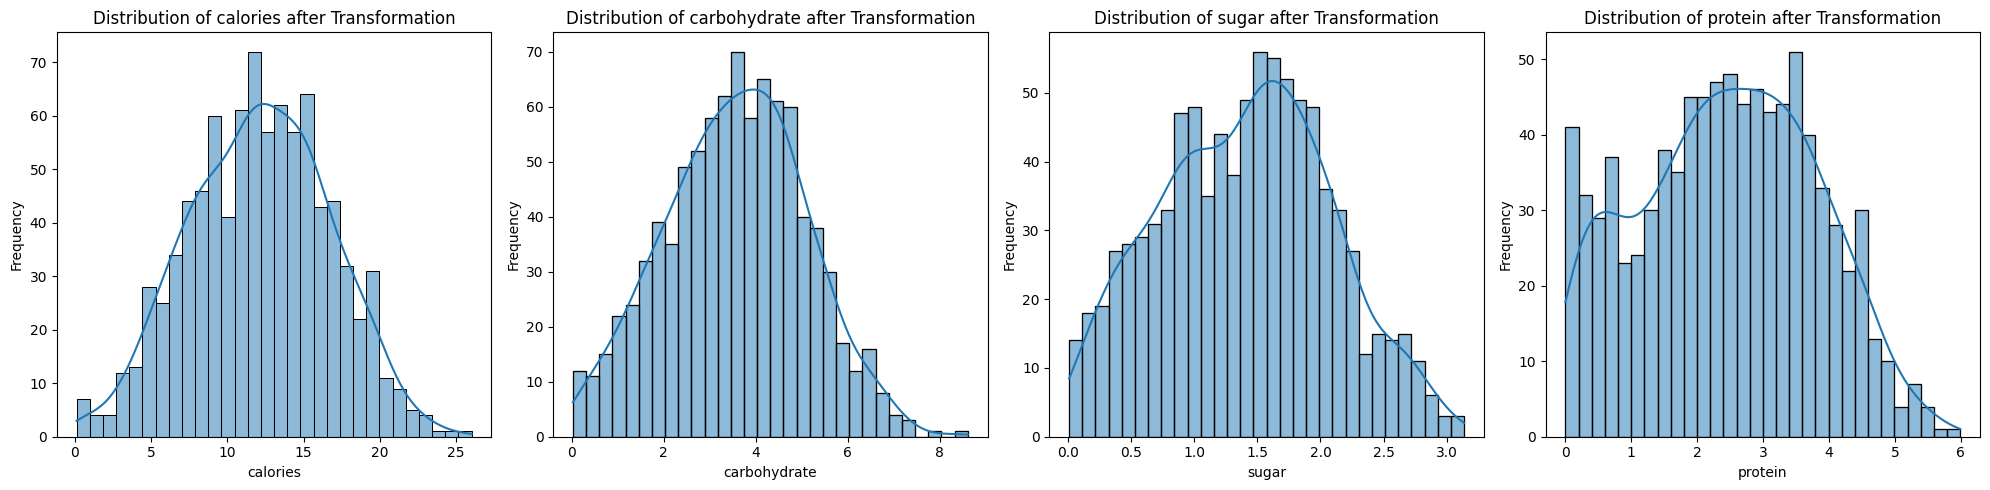

In [315]:
transformed_data = tranform_data(transformed_data, outlier_limits, method='yeojohnson_transform')

### **Step 5:** Model Development

In [316]:
# Performing One-Hot encoding on the category column
encoded_categories = pd.get_dummies(df["category"])

# Concatenate the encoded categories with the original dataframe
df_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

# Drop the original category column
df_encoded = df_encoded.drop("category", axis=1)
print(df_encoded.head())

   recipe   calories  carbohydrate     sugar   protein  servings  high_traffic  Beverages  Breakfast  Chicken  Dessert  Lunch/Snacks   Meat  One Dish Meal   Pork  Potato  Vegetable
0       2   5.742712      4.409023  0.481476  0.653469         4          True      False      False    False    False         False  False          False  False    True      False
1       3  17.437753      4.550612  1.224094  1.360783         1         False      False       True    False    False         False  False          False  False   False      False
2       4   8.416476      4.091120  2.587146  0.019804         4          True       True      False    False    False         False  False          False  False   False      False
3       5   5.133412      1.101661  0.553884  0.425754         4         False       True      False    False    False         False  False          False  False   False      False
4       6  16.024489      1.607528  0.883720  4.049462         2          True      False      

Certainly, we'll proceed as follows:

1) Split the data into features (X) and the target variable (y), where the target variable is the "high_traffic" column.
2) Further divide the data into training and testing sets using the train_test_split function from the scikit-learn library.
3) Develop both the baseline model and comparison models.
4) Fit the chosen model on the training data and employ it to predict the outcomes on the testing data. Additionally, we can utilize the predict method on the trained model to assess the potential of overfitting.
5) With this in mind, let's proceed to create the baseline and comparison machine learning models.

In [317]:
# Split the data into features (X) and target variable (y)
X = df_encoded.drop("high_traffic", axis=1)
y = df_encoded["high_traffic"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [318]:
# Create function to fit the model, make prediction, and return evaluation metrics
def develop_model(model, X_train, y_train, X_test, y_test):
    evaluation_metrics = {}

    # Fit the model
    model.fit(X_train, y_train)

    # Predict for train and test data
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    # Find evaluation parameters for train data
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
    
    evaluation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]

    # Find evaluation parameters for test data
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)
    
    evaluation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]

    return evaluation_metrics

In [319]:
# Logistic Regression - Baseline Model
logreg = LogisticRegression(solver='liblinear')
logreg_evaluation_metrics = develop_model(logreg, X_train, y_train, X_test, y_test)

In [320]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_evaluation_metrics = develop_model(rf, X_train, y_train, X_test, y_test)

# Support Vector Machines
svm = SVC(random_state=42)
svm_evaluation_metrics = develop_model(svm, X_train, y_train, X_test, y_test)

### **Step 6:** Model Evaluation

In [321]:
def print_metrics(evaluation_metrics):
    print("Accuracy:", evaluation_metrics[0])
    print("Precision:", evaluation_metrics[1])
    print("Recall:", evaluation_metrics[2])
    print("F1-Score:", evaluation_metrics[3])
    print("Confusion Matrix:\n", evaluation_metrics[4], "\n")

In [322]:
# Print the evaluation metrics and confusion matrices for Logistic Regression
print("Logistic Regression Train:")
print("---------------------------")
print_metrics(logreg_evaluation_metrics['train'])

print("Logistic Regression Test:")
print("---------------------------")
print_metrics(logreg_evaluation_metrics['test'])

Logistic Regression Train:
---------------------------
Accuracy: 0.7625698324022346
Precision: 0.8018867924528302
Recall: 0.7981220657276995
F1-Score: 0.8
Confusion Matrix:
 [[206  84]
 [ 86 340]] 

Logistic Regression Test:
---------------------------
Accuracy: 0.770949720670391
Precision: 0.8035714285714286
Recall: 0.8256880733944955
F1-Score: 0.8144796380090498
Confusion Matrix:
 [[48 22]
 [19 90]] 



The evaluation of the Logistic Regression model reveals a slight difference between test and train results. The slight elevation of test results in comparison to train results implies the presence of limited data for model development. Moreover, there is no indication of overfitting.

Given that the objective is to achieve an 80% accuracy in predicting high traffic recipes, it's essential to examine the precision, recall and f1-score metrics, which stand at 80.35%, 82.56% and 81.44% respsectively. These scores align with the goal of correctly predicting high traffic recipes 80% of the time.

In [323]:
#print the evaluation metrics and confusion matrices for Random Fores
print("Random Forest Train:")
print("---------------------------")
print_metrics(rf_evaluation_metrics['train'])

print("Random Forest Test:")
print("---------------------------")
print_metrics(rf_evaluation_metrics['test'])

Random Forest Train:
---------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[290   0]
 [  0 426]] 

Random Forest Test:
---------------------------
Accuracy: 0.7374301675977654
Precision: 0.7672413793103449
Recall: 0.8165137614678899
F1-Score: 0.7911111111111111
Confusion Matrix:
 [[43 27]
 [20 89]] 



The Random Forest model, has demonstrated an instance of overfitting due to the low number of observations within the dataset. This overfitting indicates that the model has essentially memorized the training data, rendering it unsuitable for our specific dataset.

It's important to note that various techniques, including strategies like Increasing Training Data, Regularization, and Cross-Validation, can be employed to address overfitting. However, considering the limited data available, these techniques may not yield the desired outcome.

In light of these considerations, the Decision Tree model may not be the best fit for our dataset due to its overfitting tendencies.'''

In [324]:
# Print the evaluation metrics and confusion matrices for Support Vector Machines
print("Support Vector Machines Train:")
print("---------------------------")
print_metrics(svm_evaluation_metrics['train'])

print("Support Vector Machines Test:")
print("---------------------------")
print_metrics(svm_evaluation_metrics['test'])

Support Vector Machines Train:
---------------------------
Accuracy: 0.5949720670391061
Precision: 0.5949720670391061
Recall: 1.0
F1-Score: 0.7460595446584939
Confusion Matrix:
 [[  0 290]
 [  0 426]] 

Support Vector Machines Test:
---------------------------
Accuracy: 0.6089385474860335
Precision: 0.6089385474860335
Recall: 1.0
F1-Score: 0.7569444444444444
Confusion Matrix:
 [[  0  70]
 [  0 109]] 



Within the Support Vector Machines (SVM) model, we encounter underfitting. This arises due to the model's inability to effectively learn from the limited training data available. The recall value being equal to 1 is indicative of the model consistently predicting 0 for all cases.

We can establish a Key Performance Indicator (KPI) by dividing True Positives (high recipes correctly classified as high) by False Positives (low recipes mistakenly classified as high) within the confusion matrix. This KPI, which we can refer to as the "High Traffic Conversion Rate," needs to be maintained at a level equal to or greater than 4.0, relying on the train and test results of our baseline model. This KPI can serve as a valuable metric for our business model, providing insights into the accuracy of high traffic predictions.'''

In [325]:
# KPI calculation
def calculate_kpi(model_metrics, model_name):
    kpi_train = model_metrics['train'][4]
    kpi_test = model_metrics['test'][4]
    print(f"High Traffic Conversion Rate for {model_name} train: ", kpi_train[1][1]/(kpi_train[0][1]))
    print(f"High Traffic Conversion Rate for {model_name} test: ", kpi_test[1][1]/(kpi_test[0][1]))

In [326]:
# KPI calculation for Logistic Regression
calculate_kpi(logreg_evaluation_metrics, "Logistic Regresssion")
print("------------------------------------------------------------------------------------")

# KPI calculation for Random Forest
calculate_kpi(rf_evaluation_metrics, "Random Forest")
print("------------------------------------------------------------------------------------")

# KPI calculation for Support Vector Machines
calculate_kpi(svm_evaluation_metrics, "Support Vector Machines")
print("------------------------------------------------------------------------------------")

High Traffic Conversion Rate for Logistic Regresssion train:  4.0476190476190474
High Traffic Conversion Rate for Logistic Regresssion test:  4.090909090909091
------------------------------------------------------------------------------------
High Traffic Conversion Rate for Random Forest train:  inf
High Traffic Conversion Rate for Random Forest test:  3.2962962962962963
------------------------------------------------------------------------------------
High Traffic Conversion Rate for Support Vector Machines train:  1.4689655172413794
High Traffic Conversion Rate for Support Vector Machines test:  1.5571428571428572
------------------------------------------------------------------------------------


In the training results of the Random Forest models the "KPI = inf" occurs due to overfitting. Furthermore, the test results for these models fall short of meeting our predetermined KPI requirement.

In both the training and testing results of the SVM model, without specifying the kernel, underfitting contributes to the non-fulfillment of our KPI requirement.

Ultimately, in our baseline Logistic Regression model, both the training and testing results successfully adhere to our KPI requirement.

### **Step 7:** Summary

In summary, our efforts involved developing and evaluating several predictive models to meet our objective. Among these, the logistic regression model demonstrated the strongest performance, making it the most suitable choice for identifying high-traffic recipes and approaching the target accuracy of 80%.

From a business standpoint, misclassifying a high-traffic recipe as low traffic poses a greater risk than the reverse. For this reason, we placed particular emphasis on model precision. Failing to recognize a recipe with high traffic potential could lead to missed opportunities and reduced user engagement.

To guide evaluation, we introduced a custom Key Performance Indicator (KPI) called the High Traffic Conversion Rate, initially derived from the performance of our baseline model. This KPI was then used to benchmark and compare the effectiveness of all subsequent models.

Our exploratory data analysis also revealed clear trends in recipe categories. Recipes labeled as “Vegetable,” “Potato,” or “Pork” were consistently associated with high traffic, making them strong candidates for homepage placement. In contrast, “Beverages” were frequently linked to low traffic, suggesting they may be less suitable for feature.